## Whats cooking ???


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_json("train.json")
df_test = pd.read_json("test.json")

In [4]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


## As a first step lets look at the cuisine in the dataset


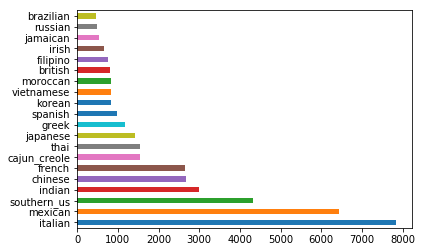

In [5]:
df_train['cuisine'].value_counts().plot(kind = 'barh')

#### There are lot of Italian, Maxican and Sothern US recipies 
#### Count the most frequent Ingredient for each cuisine.

In [6]:
from collections import Counter

In [8]:
counters = {}

for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [9]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

### Lets make a Dataframe with top 10 indredients for each cuisine

In [10]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index = [cuisine for cuisine in counters],
            columns = ['top{}'.format(i) for i in range (1,11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


-  salt is the standard for most cuisines
-  soy sauce is number one for chinese, japanese and korean cuisines
-  fish sauce is number one for thai and vietnamese cuisines
-  Another things that is easily seen from this table is that many ingredients have more than one name:

-  garlic cloves, garlic
-  olive oil, extra-virgin olive oil

Jugding from this table, it can be interesting to see which ingredients among the top10 ingredients are highly specific for a certain cuisine. A way to do this is to simply count the number of times an ingredient appears in a given cuisine and divide by the total number of recipes.

To do this, we first create a new column in our dataframe by simply concatening the ingredients to a single string:

In [11]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)


In [12]:
df_train.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


We can now take advantage of the powerful string processing functions of pandas to check for the presence of an ingredient in a recipe:

In [13]:
df_train['all_ingredients'].str.contains('garlic cloves')


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
39744     True
39745    False
39746    False
39747    False
39748    False
39749    False
39750    False
39751    False
39752    False
39753     True
39754     True
39755    False
39756    False
39757     True
39758    False
39759    False
39760    False
39761     True
39762    False
39763    False
39764    False
39765    False
39766    False
39767    False
39768    False
39769    False
39770    False
39771    False
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

This can be used to group our recipes by the presence of that ingredient:

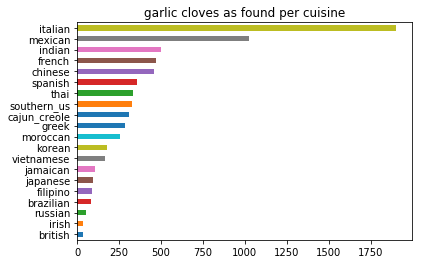

In [29]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().sort_values().plot(kind='barh',
                                                 title='garlic cloves as found per cuisine')

However, we have to keep in mind that there are a lot of Italian recipes in our database, so it's appropriate to divide by that number before presenting the result:

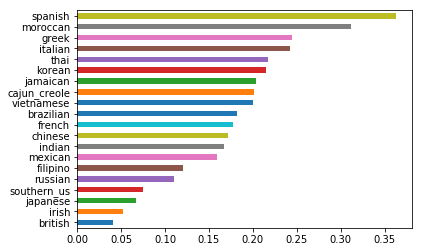

In [27]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
               
relative_freq.sort_values(inplace= True)
relative_freq.plot(kind='barh')

This way of looking at the data lets us see which countries use garlic cloves a lot in the recipes found in the database. As expected, mediterranean and asian cuisines are at the top, and british at the bottom.

We can do this sort of plot for all top 10 ingredients. First let's determine the unique ingredients:

In [31]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

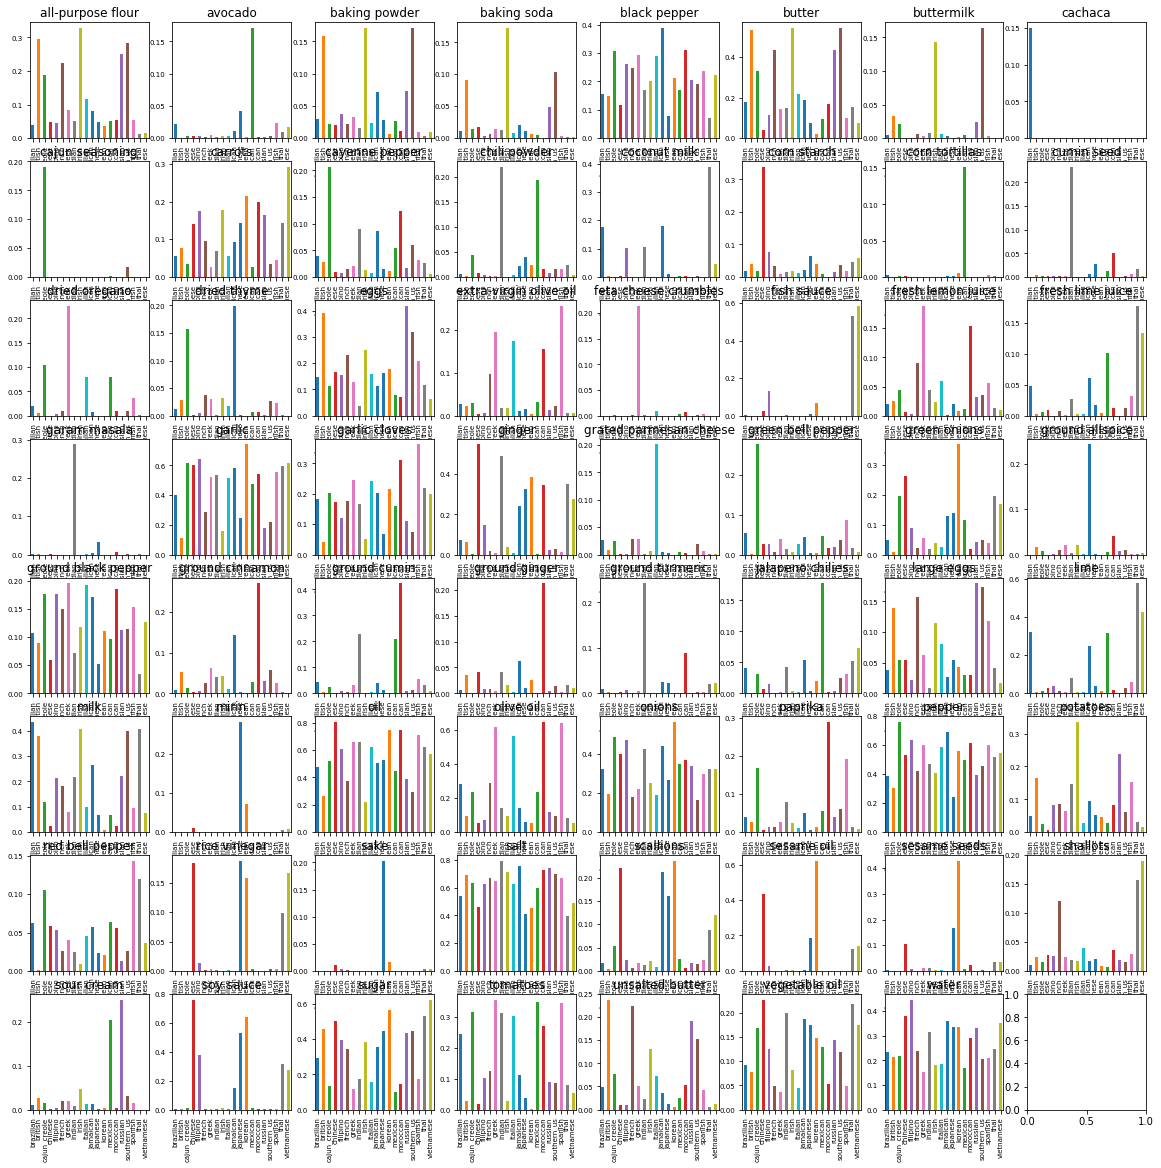

In [32]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)


The previous diagram, even if it's not very clear, allows us to spot ingredients which have a high degree of uniqueness. Among them, I'd list:

-  soy sauce (asian cuisine)
-  sake (Japanese)
-  sesame oil (asian cuisine)
-  feta cheese crumbs (Greek)
-  garam masala (Indian)
-  ground ginger (Morrocan)
-  avocado (Mexican)

Others are quite common:

-  salt
-  oil
-  pepper
-  sugar

## Training a logistic regression classifier

We will use scikit-learn to perform our classification. First, we will need to encode our features to a matrix that the machine learning algorithms in scikit learn can use. This is done using a count vectorizer:

In [33]:
from sklearn.feature_extraction.text import CountVectorizer


In [34]:
cv = CountVectorizer()

We can conveniently tell the count vectorizer which features it should accept and let him build the matrix with 1s and 0s when ingredients are present in a single step as follows:

In [35]:
X = cv.fit_transform(df_train['all_ingredients'].values)


In [36]:
X.shape

(39774, 3010)

We see that the vectorizer has retained 3010 ingredients and processed the 40 000 recipes in the training dataset. We can easily access the features to check them using the vectorizers properties (which is a dictionary):

In [37]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

Each feature gets assigned a column number, which is assigned a 1 or a 0 depending on the presence or not of the ingredient.

Now that we have our feature matrix, we still need to encode the labels that represent the cuisine of each recipe. This is done with a label encoder:

In [38]:
from sklearn.preprocessing import LabelEncoder



In [39]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

The variable y is now a vector with number instead of strings for each cuisine:

In [40]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [41]:
# we can check the encoder class
enc.classes_


array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

Let's now train a logistic regression on the dataset. We'll split the dataset so that we can also test our classifier on data that he hasn't seen before:

In [42]:
from sklearn.cross_validation import train_test_split



/Users/shreedevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [44]:
from sklearn.linear_model import LogisticRegression



In [45]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
logistic.score(X_test, y_test)

0.7841609050911377

It turns out it performs quite nicely, with a 78% accuracy.

However, this doesn't tell the whole story about what's happening. Let's inspect the classification results using a confusion matrix.

### Inspecting the classification results using a confusion matrix
A confusion matrix allows us to see the confusion the classifier makes. It should be read column by column. In each column, one sees the recipes the classifier considered to be one cuisine. Looking at the color in each square one can see the relative accuracy of that classification.

Text(0.5,64.6,'Predicted label')

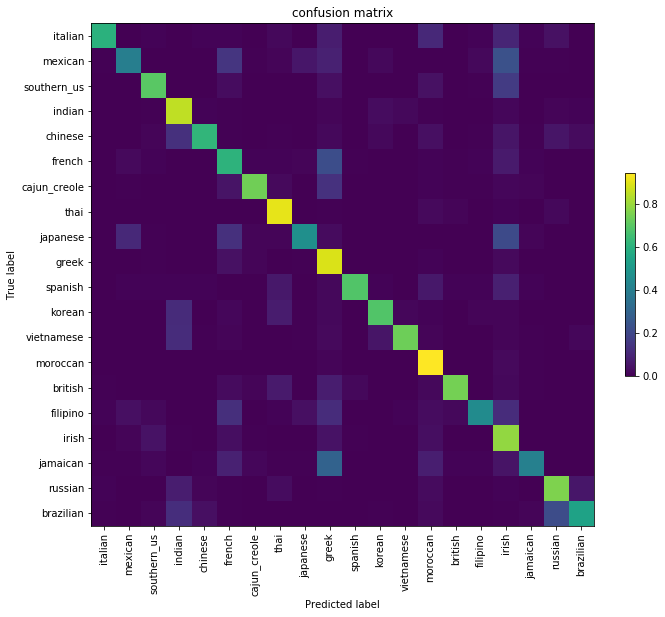

In [47]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [48]:
from sklearn.metrics import classification_report

In [49]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.80      0.60      0.69        93
     mexican       0.56      0.40      0.47       159
 southern_us       0.76      0.70      0.73       325
      indian       0.79      0.85      0.82       549
     chinese       0.79      0.62      0.69       153
      french       0.60      0.61      0.60       533
cajun_creole       0.81      0.74      0.77       236
        thai       0.87      0.91      0.89       585
    japanese       0.65      0.47      0.55       138
       greek       0.80      0.89      0.84      1608
     spanish       0.84      0.69      0.75        96
      korean       0.81      0.69      0.74       274
  vietnamese       0.86      0.74      0.80       174
    moroccan       0.89      0.94      0.92      1239
     british       0.84      0.74      0.79       149
    filipino       0.64      0.46      0.53       101
       irish       0.70      0.79      0.74       875
    jamaican       0.69    

This allows use to see the different precision measurements (accuracy, recall, f1 score) all in a single place.

From the previous analyses, we can come up with a number of ways of how to improve aspects of our machine learning and reach better classification results.

In [57]:
from sklearn.linear_model import LogisticRegressionCV

In [47]:
lrm = LogisticRegressionCV(tol=0.0001)
lrm.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [54]:
lrm.score(X_test,y_test)

0.8438717787554997

In [51]:

# Predictions 
print ("Predict on test data ... ")
y_predict = lrm.predict(X_test)
#y_pred = lb.inverse_transform(y_test)


Predict on test data ... 


In [52]:
print(classification_report(y_test, y_predict, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.85      0.65      0.73        96
     mexican       0.71      0.60      0.65       161
 southern_us       0.85      0.72      0.78       313
      indian       0.85      0.91      0.88       537
     chinese       0.84      0.78      0.81       150
      french       0.69      0.72      0.71       526
cajun_creole       0.87      0.81      0.84       236
        thai       0.88      0.93      0.91       579
    japanese       0.85      0.61      0.71       127
       greek       0.84      0.93      0.88      1553
     spanish       0.91      0.79      0.85       114
      korean       0.89      0.80      0.84       279
  vietnamese       0.90      0.89      0.89       164
    moroccan       0.92      0.95      0.94      1274
     british       0.92      0.85      0.89       173
    filipino       0.83      0.51      0.63       101
       irish       0.77      0.85      0.81       871
    jamaican       0.76    

In [55]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

classifier = SVC(C=100, # penalty parameter
                 kernel='rbf', # kernel type, rbf working fine here
                 degree=3, # default value
                 gamma=1, # kernel coefficient
                 coef0=1, # change to 1 from default value of 0.0
                 shrinking=True, # using shrinking heuristiΩ
                 tol=0.001, # stopping criterion tolerance 
                 probability=False, # no need to enable probability estimates
                 cache_size=200, # 200 MB cache size
                 class_weight=None, # all classes are treated equally 
                 verbose=False, # print the logs 
                 max_iter=-1, # no limit, let it run
                 decision_function_shape=None, # will use one vs rest explicitly 
                random_state=None)
model = OneVsRestClassifier(classifier, n_jobs=4)

In [56]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=4)

In [57]:
model.score(X_test,y_test)

0.9997485857950974

In [58]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.83      0.62      0.71        96
     mexican       0.71      0.54      0.61       161
 southern_us       0.85      0.75      0.80       313
      indian       0.84      0.89      0.87       537
     chinese       0.86      0.77      0.81       150
      french       0.70      0.71      0.70       526
cajun_creole       0.87      0.77      0.81       236
        thai       0.88      0.93      0.91       579
    japanese       0.85      0.69      0.76       127
       greek       0.84      0.93      0.88      1553
     spanish       0.92      0.74      0.82       114
      korean       0.89      0.77      0.83       279
  vietnamese       0.89      0.85      0.87       164
    moroccan       0.92      0.94      0.93      1274
     british       0.92      0.83      0.87       173
    filipino       0.85      0.63      0.73       101
       irish       0.77      0.84      0.81       871
    jamaican       0.73    